In [348]:
import numpy as np
import matplotlib.pyplot as plt
import time

import sys
sys.path.append("..")
sys.path.append("../../")

from armControl import *
from forwardKinematics import robot_config
from utils.motor_setup import maxonGearSmall
import armControl

import signal

socket_ip = '192.168.0.112'
socket_port = 1122

motors = maxonGearSmall()
motors.tcp_init(socket_ip, socket_port)

print("Arming motors now...")
motors.arm_motors()

for i in range(8):
    motors.zero_motors_radians(i, motors.get_motors_position_radians()[i])

Opening socket at ip: 192.168.0.112 using port: 1122
Arming motors now...
initializing motors to [0 0 0 0 0 0 0 0]
*** C side has an error or needs to be armed ***

Arming motors


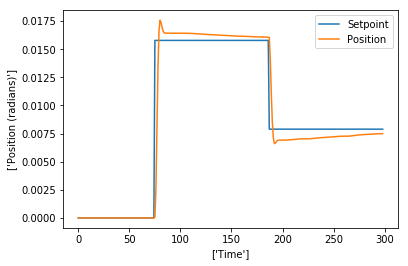

In [349]:
myArm = armControl.remoteRobotArm()
dt = 0.01
rt = 3
hz = 0.5
amplitude = 0.01#0.25 #this causes chirping, 0.25

setpoint_arm = np.array([-0.0,-0.,0.,-0.,-0.,0,0])
myArm.commandJoints(motors, setpoint_arm, trajectory=False)

motorSetpoints = []
motorPositions = []

y = np.vstack([np.zeros([int(rt/dt/4),1]),np.ones([int(rt/dt*3/8),1])*amplitude,np.ones([int(rt/dt*3/8),1])*amplitude/2])
#y = np.vstack([y.copy(), y.copy()])

for i in range(int(rt/dt)-1):
    x = y[i]*amplitude
    setpoint_arm = np.ones(7)*x#np.array([-0.0,-0.,x,-0.,-0.,0,0])
    myArm.commandJoints(motors, setpoint_arm, trajectory=False)
    
    motorSetpoints.append(motors.get_motors_setpoint_radians())
    motorPositions.append(motors.get_motors_position_radians())
    time.sleep(dt)
    
motorSetpoints = np.array(motorSetpoints)
motorPositions = np.array(motorPositions)


plt.figure()
plt.plot(motorSetpoints[:,1])
plt.plot(motorPositions[:,1])
plt.legend(['Setpoint', 'Position'])
plt.xlabel(['Time'])
plt.ylabel(['Position (radians)'])
plt.show()

## Sine wave

In [351]:
myArm = armControl.remoteRobotArm()
dt = 0.005
rt = 10000
hz = 0.5
startPos = 0.0
amplitude = 0.0004 #

setpoint_arm = np.array([-0.0,-0.,0.,-0.,-0.,0,0])
myArm.commandJoints(motors, setpoint_arm, trajectory=True)

motorSetpoints = []
motorPositions = []

for i in range(int(rt/dt-1)):
    x = np.sin(i*2*np.pi*dt*hz)*amplitude+startPos
    setpoint_arm = np.ones(7)*x#np.array([-0.0,-0.,x,-0.,-0.,0,0])
    myArm.commandJoints(motors, setpoint_arm, trajectory=False)
    
    motorSetpoints.append(motors.get_motors_setpoint_radians())
    motorPositions.append(motors.get_motors_position_radians())
    time.sleep(dt)
    
motorSetpoints = np.array(motorSetpoints)
motorPositions = np.array(motorPositions)
#plt.plot(motorSetpoints[:,:])
#plt.plot(motorPositions[:,:])
plt.figure()
plt.plot(motorSetpoints[:,1])
plt.plot(motorPositions[:,1])
plt.legend(['Setpoint', 'Position'])
plt.xlabel(['Time'])
plt.ylabel(['Position (radians)'])
plt.show()



Server side closed. Closing ports now.


We had a timeout (probably)?


OSError: [Errno 9] Bad file descriptor

In [347]:
setpoints = np.zeros(8)
velocity = np.ones(8)*3.14/5
motors.run_trajectory(setpoints, velocity)
time.sleep(1)
motors.tcp_close()